# ACM40960 Projects in Maths Modelling-CVD predictive modeling


## Introduction

Cardiovascular disease (CVD) is the world’s leading cause of death and a major public health problem. CVD prediction is one of the most effective measures to control CVD. Based on this, the project initially determined to select 70,000 copies including age and gender and blood pressure, etc., classify the data according to whether or not they are sick. First, explore the data set, find the features that are highly related to CVD, and then use logistic models to predict, including multiple regression model, SVM and Random Forest, etc., and find the best model by comparing their predictive performance, optimize and evaluate the best model, and hope to use the best model to provide a reference for the detection of CVD.


## Data Pre-processing and Initial Exploratory

The data set includes 70,000 patient data records with 12 characteristics such as age, gender, systolic blood pressure, and diastolic blood pressure. When the patient has cardiovascular disease, the target class "cardio" is equal to 1, and if the patient is healthy, it is 0.

In [248]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling

In [249]:
data = pd.read_csv('/Users/miaogangrui/Desktop/cardio_train.csv',sep=';') # Import data set

In [250]:
data.head()  # View data set and variables

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [251]:
data = data.drop(['id'],axis=1)  # Remove variables that are not related to prediction

In [252]:
data.describe()  # Statistical analysis of data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


From the above statistical analysis results, we can see that diastolic blood pressure and systolic blood pressure have serious outliers, so we need to delete outliers.

In [253]:
# delete ap_hi outliers
Q1 = data['ap_hi'].quantile(0.25)
Q3 = data['ap_hi'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['ap_hi'] < (Q1 - 1.5 * IQR)) |(data['ap_hi'] > (Q3 + 1.5 * IQR)))]

In [254]:
data = data[data['ap_lo'] < 150]   # delete ap_lo outliers

In [255]:
pandas_profiling.ProfileReport(data)  # Exploratory analysis of data

In [257]:
# Correlation analysis
correlations = data.corr()['cardio'].drop('cardio')
correlations

age            0.238966
gender         0.005594
height        -0.010617
weight         0.176028
ap_hi          0.434877
ap_lo          0.330227
cholesterol    0.221060
gluc           0.088580
smoke         -0.017928
alco          -0.009599
active        -0.037918
Name: cardio, dtype: float64

Through the above correlation analysis, we can see that gender, height, gluc, smoke, alcohol intake and physical activity have a low correlation with cardio, so we delete these variables.

In [258]:
data = data.drop(['gender','height','gluc','smoke','alco','active'],axis=1)  # Remove variables that have low correlation with cardio

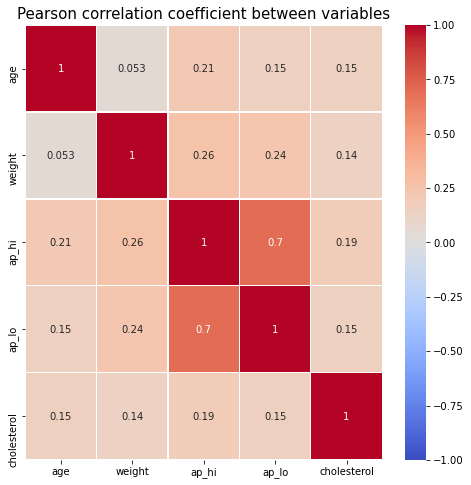

In [259]:
# Pearson correlation plot
data_var = data.drop(['cardio'],axis=1)  
plt.figure(figsize=(8, 8))
sns.heatmap(data_var.corr(), vmin=-1, cmap='coolwarm', linewidths=0.1, annot=True)
plt.title('Pearson correlation coefficient between variables', fontdict={'fontsize': 15})
plt.show()

As can be seen from the correlation figure above, the correlation between the explanatory variables is less than 0.8, so there is no problem of multicollinearity.

Below we will visualize the data and initially explore the relationship between each explanatory variable and the target variable

<AxesSubplot:xlabel='cardio', ylabel='weight'>

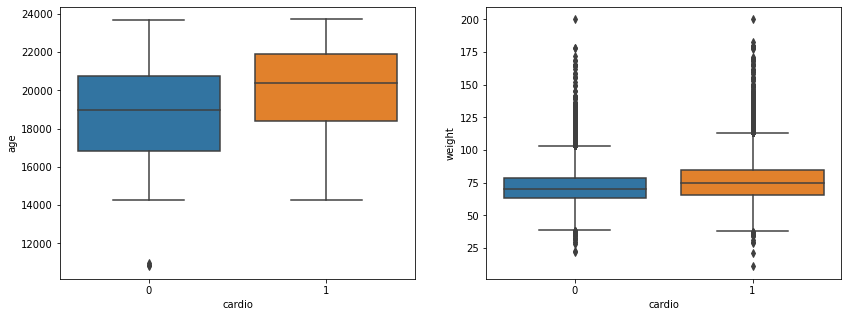

In [260]:
# age and cardio
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='age',data=data)
# weight and cardio
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=data)

As can be seen from the box plot above, people who are older and overweight are prone to cardiovascular disease.

<AxesSubplot:xlabel='cardio', ylabel='cholesterol'>

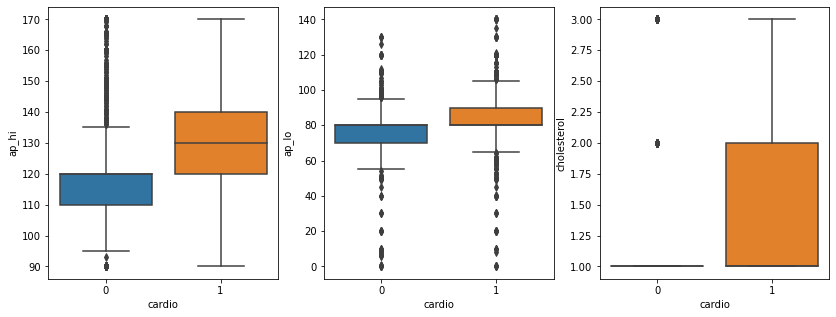

In [261]:
# ap_hi and cardio
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(x='cardio',y='ap_hi',data=data)
# ap_lo and cardio
plt.subplot(1,3,2)
sns.boxplot(x='cardio',y='ap_lo',data=data)
# cholesterol and cardio
plt.subplot(1,3,3)
sns.boxplot(x='cardio',y='cholesterol',data=data)

As can be seen from the box plot above, people who has higher blood pressure and cholesterol are prone to cardiovascular disease.

## Predictive Analysis

In the last stage, we completed the work of data cleaning and selection of explanatory variables. This is the basic work for us to establish predictive models. Next, we will carry out the core work of this project-establishing predictive models.

### Logistic Regression Model

In [242]:
# Import packages of logistic regression 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [243]:
# Split dataset in explanatory variables and target variable
feature_cols = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol']
X = data[feature_cols]   # Explanatory variables
X_std = (X-X.mean())/X.std()  # Data standardization
y = data.cardio   # Target variable

In [244]:
# Split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [245]:
# Fit the model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [246]:
# Use the classification matrix to view the classification result
matrix_class = metrics.confusion_matrix(y_test, y_pred)
matrix_class

array([[5672, 2912],
       [3652, 4697]])

As we can see, the main diagonal of the matrix is correctly classified, and the rest are incorrectly classified.

In [247]:
# Compute the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6123545739089352


The accuracy rate of the logistic regression model reached 61%, which is not bad, but it is not enough to meet the actual medical requirements. Next, we will try other models to find a model with a higher accuracy rate.